In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
np.random.seed(123)
random.seed(123)

In [23]:
## leemos los conjuntos de datos
df_features = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_stores = pd.read_csv('stores.csv')



In [24]:


df_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


Contiene datos adicionales relacionados con la tienda, el departamento y la actividad regional durante las mismas fechas del conjunto de entrenamiento. Las columnas incluidas son:

Store: Número de la tienda.
Date: Fecha correspondiente a la semana.
Temperature: Temperatura promedio de la región (en grados Fahrenheit).
Fuel_Price: Precio del combustible en la región.
MarkDown1 a MarkDown5: Datos anonimizados relacionados con promociones especiales de descuentos que se llevaron a cabo en Walmart.
CPI (Consumer Price Index): Índice de precios al consumidor, que mide los cambios mensuales en los precios pagados por los consumidores estadounidenses.

In [25]:

df_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


stores.csv: Proporciona información anonimizada sobre las 45 tiendas, detallando su tipo y tamaño. Contiene las siguientes columnas:

Store: Número de tienda (del 1 al 45).
Type: Tipo de tienda, clasificada en tres categorías: A, B y C.
Size: Tamaño de la tienda (en pies cuadrados).

In [26]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


train.csv: Datos históricos de entrenamiento, que abarcan del 5 de febrero de 2010 al 1 de noviembre de 2012. Este archivo incluye las siguientes columnas:

Store: Número de la tienda.
Dept: Número del departamento.
Date: Fecha correspondiente a la semana.
Weekly_Sales: Ventas semanales del departamento en la tienda específica.
IsHoliday: Indica si la semana corresponde a una semana especial por ser festiva.

In [44]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [27]:

## se juntan las tres bases de datos con un merge para tener la información consolidades

df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
df.head(10)










,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [28]:
##  valores faltantes

print(df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


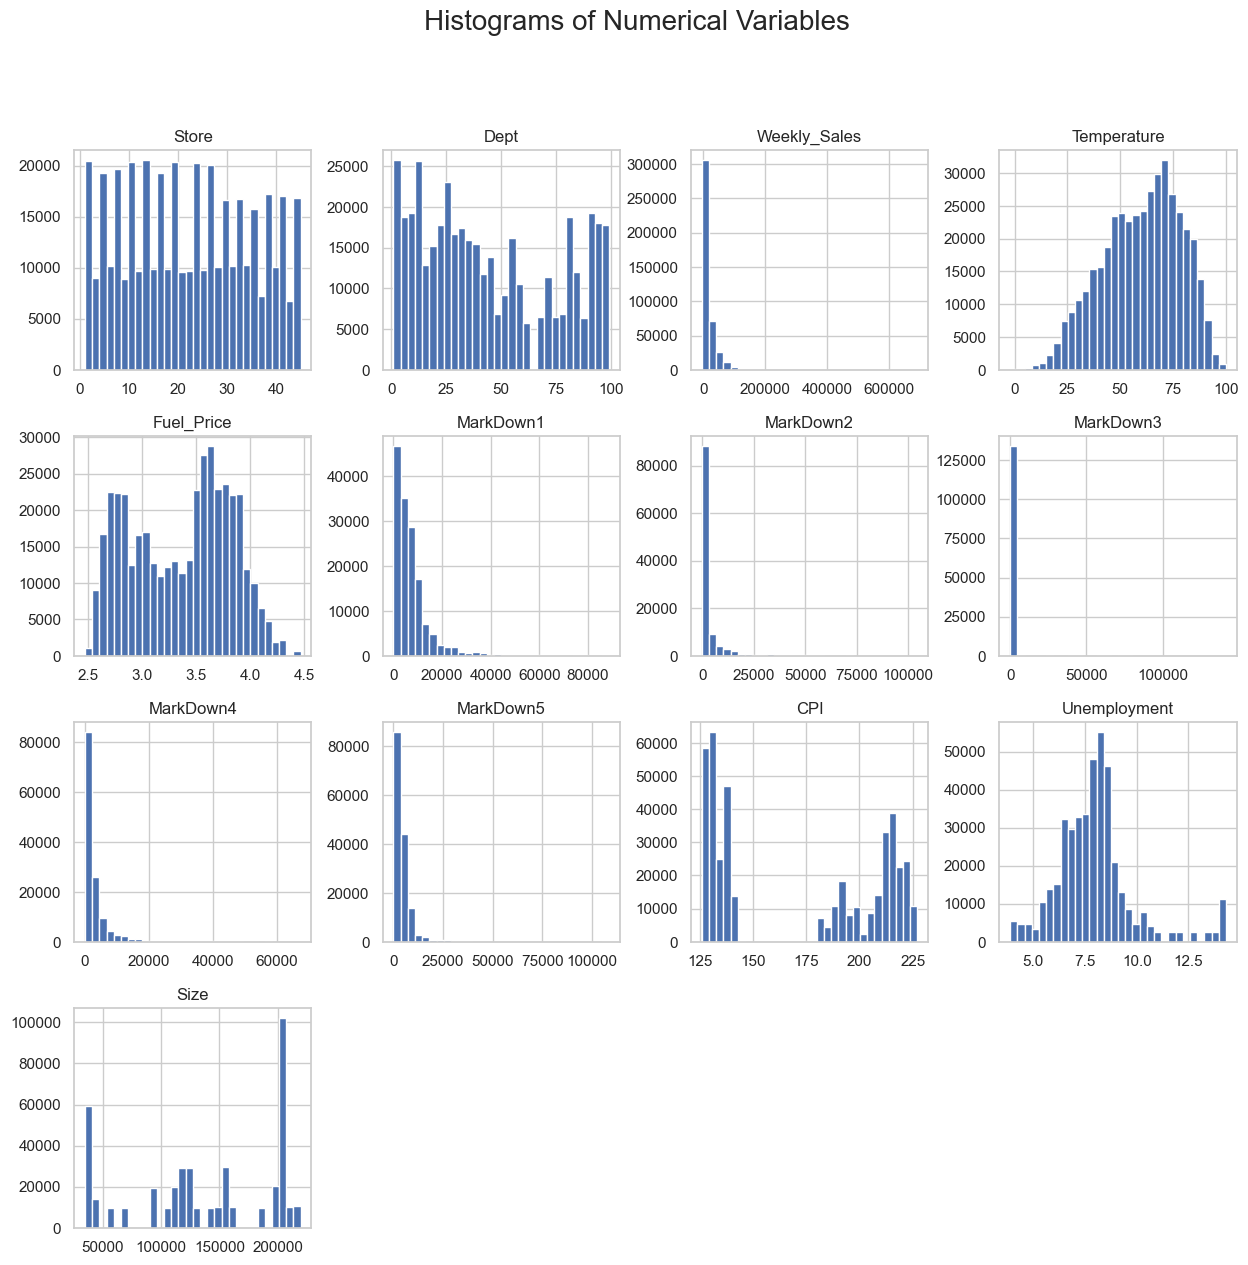

In [29]:
## Limpieza de los datos

sns.set(style="whitegrid")

# Plot histograms for numerical variables
df.hist(bins=30, figsize=(15, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.show()


In [30]:
## los datos vacíos en las columnas Markdown se reemplazan por Ceros, ## los datos faltantes aquí los imputamos con 0, es decir, como si ese venta no hubiese tenido descuento especial

df = df.fillna(0)

In [31]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

In [32]:
## se elimina la variable isHoliday_Y ya que está duplicada

df.drop(['IsHoliday_y'], axis=1,inplace=True) 




In [33]:
df.shape

(421570, 16)

1358 observaciones tienen datos negativos en la columna de ventas semanales, lo cual no tiene sentido, como es el 3.19% eliminamos esos regsitros

In [34]:
count_negative = df.loc[df['Weekly_Sales'] <= 0].shape[0]

print(count_negative) ##

df = df.loc[df['Weekly_Sales'] > 0].reset_index(drop=True)

print(df.shape)


1358
(420212, 16)


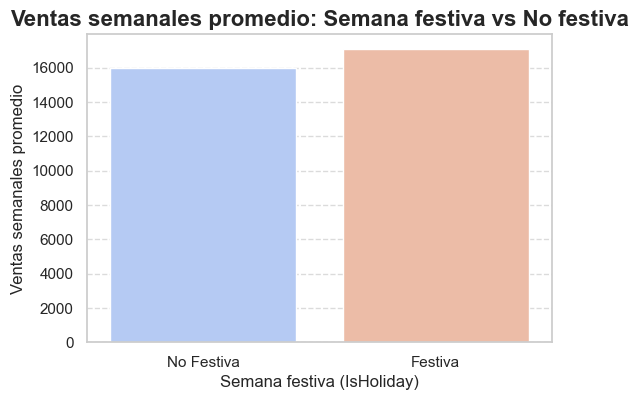

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=df, palette='coolwarm', ci=None)

plt.title('Ventas semanales promedio: Semana festiva vs No festiva', fontsize=16, fontweight='bold')
plt.xlabel('Semana festiva (IsHoliday)', fontsize=12)
plt.ylabel('Ventas semanales promedio', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Festiva', 'Festiva'], fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [43]:
## miremos que fechas son holidays

df_2010_holidays = df[(df['IsHoliday_x'] == True) ]
dates_2010_holidays = df_2010_holidays['Date'].unique()
print("Fechas festivas:", dates_2010_holidays)

##podemos cambair estas fechas a esas festividades, y puede que nos mejore el modelo 

Fechas festivas: ['2010-02-12' '2010-09-10' '2010-11-26' '2010-12-31' '2011-02-11'
 '2011-09-09' '2011-11-25' '2011-12-30' '2012-02-10' '2012-09-07']


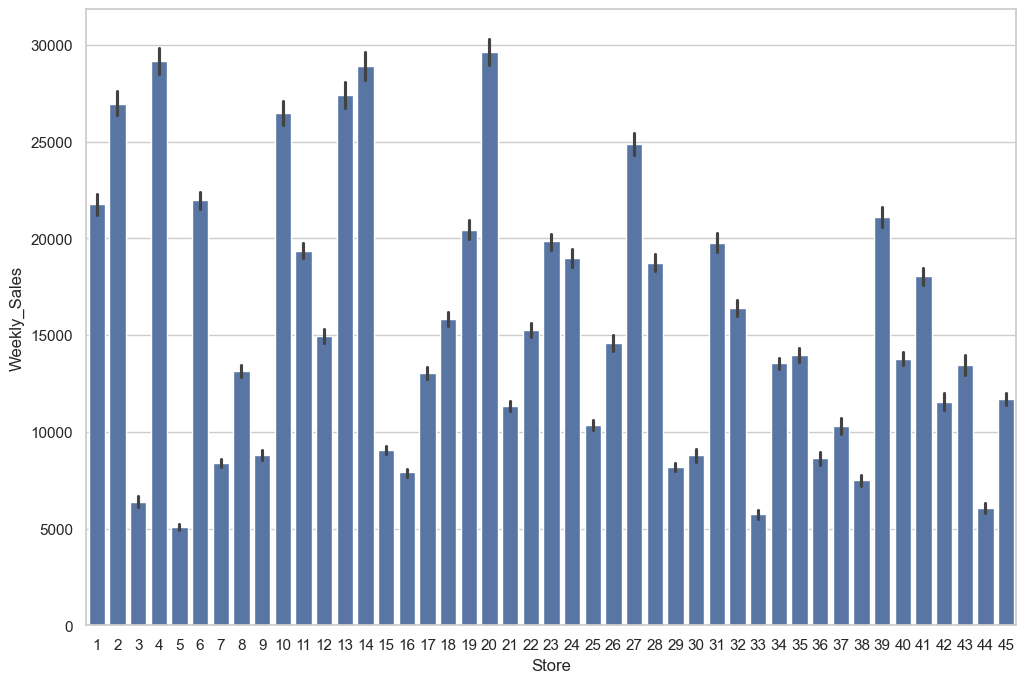

In [ ]:
## ventas por departamento

plt.figure(figsize=(12,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.show()

In [59]:

## diccionario para días especiales, para hacer más amplia la columna de Holidays

dict_holidays = {
    "super_bowl": ['2010-02-12', '2011-02-11', '2012-02-10'],
    "valentines_day": ['2010-02-14', '2011-02-14', '2012-02-14'],
    "womens_day": ['2010-03-08', '2011-03-08', '2012-03-08'],
    "mothers_day": ['2010-05-12', '2011-05-08', '2012-05-13'],
    "childrens_day": ['2010-06-09', '2011-06-09', '2012-06-09'],
    "fathers_day": ['2010-06-16', '2011-06-19', '2012-06-17'],
    "labor_day": ['2010-09-10', '2011-09-09', '2012-09-07'],
    "halloween": ['2010-10-31', '2011-10-31', '2012-10-31'],
    "thanksgiving": ['2010-11-26', '2011-11-25', '2012-11-22'],
    "black_friday": ['2010-11-26', '2011-11-25', '2012-11-23'],
    "christmas_day": ['2010-12-24', '2011-12-24', '2012-12-24'],
    "new_years_day": ['2010-12-31', '2011-12-31', '2012-12-31']
}


In [60]:
df['Date'] = pd.to_datetime(df['Date'])


In [61]:
# Convertir todas las fechas de dict_holidays a una lista única
holiday_dates = pd.to_datetime(sum(dict_holidays.values(), []))

# Crear la nueva columna new_holiday
df['new_holiday'] = df['Date'].isin(holiday_dates).astype(int)


In [62]:
print(holiday_dates)

DatetimeIndex(['2010-02-12', '2011-02-11', '2012-02-10', '2010-02-14',
               '2011-02-14', '2012-02-14', '2010-03-08', '2011-03-08',
               '2012-03-08', '2010-05-12', '2011-05-08', '2012-05-13',
               '2010-06-09', '2011-06-09', '2012-06-09', '2010-06-16',
               '2011-06-19', '2012-06-17', '2010-09-10', '2011-09-09',
               '2012-09-07', '2010-10-31', '2011-10-31', '2012-10-31',
               '2010-11-26', '2011-11-25', '2012-11-22', '2010-11-26',
               '2011-11-25', '2012-11-23', '2010-12-24', '2011-12-24',
               '2012-12-24', '2010-12-31', '2011-12-31', '2012-12-31'],
              dtype='datetime64[ns]', freq=None)


In [63]:
df_holidays = df[df['new_holiday'] == 1]
print(df_holidays[['Date', 'new_holiday']].head(20))



          Date  new_holiday
1   2010-02-12            1
31  2010-09-10            1
42  2010-11-26            1
46  2010-12-24            1
47  2010-12-31            1
53  2011-02-11            1
83  2011-09-09            1
94  2011-11-25            1
105 2012-02-10            1
135 2012-09-07            1
144 2010-02-12            1
174 2010-09-10            1
185 2010-11-26            1
189 2010-12-24            1
190 2010-12-31            1
196 2011-02-11            1
226 2011-09-09            1
237 2011-11-25            1
248 2012-02-10            1
278 2012-09-07            1


In [64]:
def get_holiday_name(date):
    for holiday, dates in dict_holidays.items():
        if str(date.date()) in dates:
            return holiday
    return "None"

df['holiday_name'] = df['Date'].apply(get_holiday_name)


In [65]:
sales_by_holiday = df[df['holiday_name'] != "None"].groupby('holiday_name')['Weekly_Sales'].sum().reset_index()
print(sales_by_holiday)


    holiday_name  Weekly_Sales
0  christmas_day  8.093159e+07
1      labor_day  1.407296e+08
2  new_years_day  4.043474e+07
3     super_bowl  1.456838e+08
4   thanksgiving  1.324151e+08


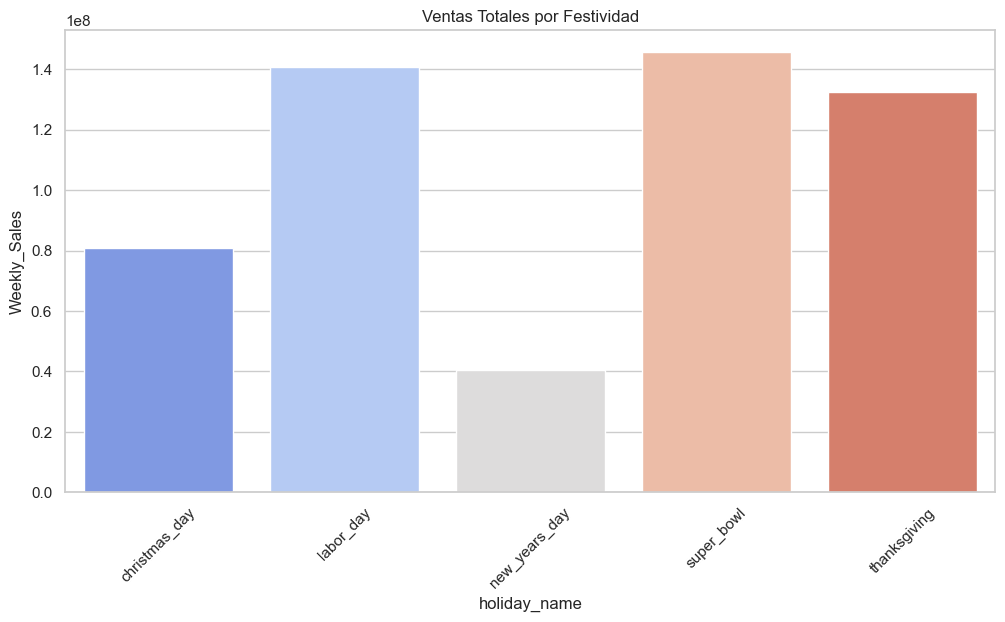

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='holiday_name', y='Weekly_Sales', data=sales_by_holiday, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Ventas Totales por Festividad')
plt.show()


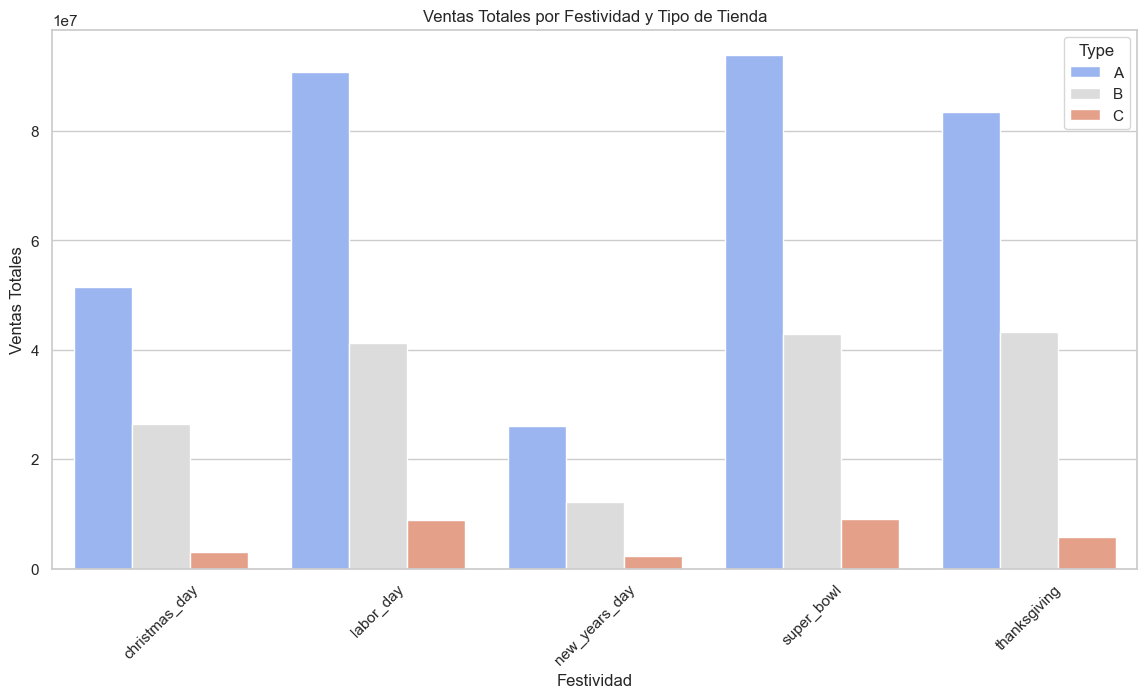

In [67]:
sales_by_holiday_type = df[df['holiday_name'] != "None"].groupby(['holiday_name', 'Type'])['Weekly_Sales'].sum().reset_index()

# Visualización
plt.figure(figsize=(14, 7))
sns.barplot(x='holiday_name', y='Weekly_Sales', hue='Type', data=sales_by_holiday_type, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Ventas Totales por Festividad y Tipo de Tienda')
plt.xlabel('Festividad')
plt.ylabel('Ventas Totales')
plt.show()


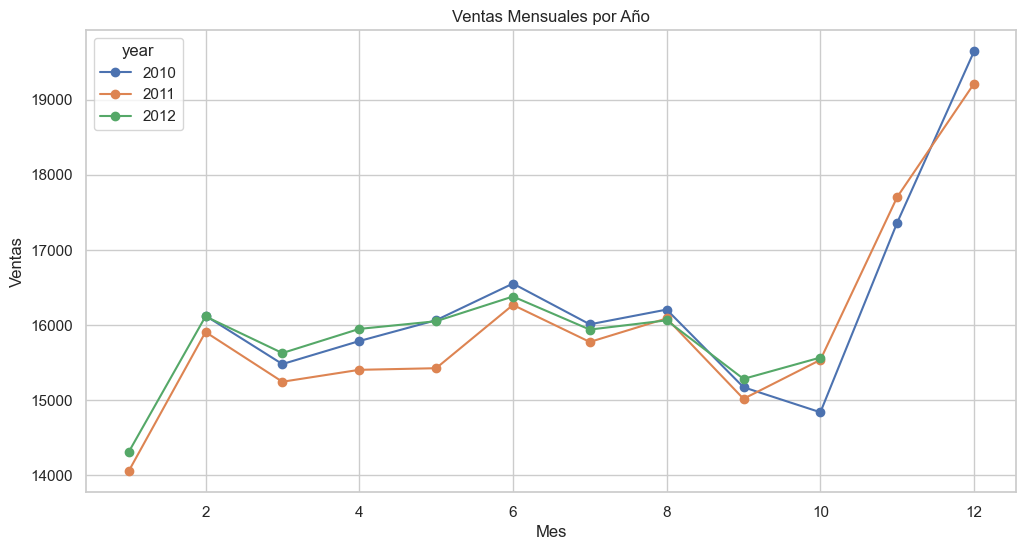

In [70]:
df["Date"] = pd.to_datetime(df["Date"])  # Convertir a datetime
df['week'] = df['Date'].dt.isocalendar().week  # Obtener la semana del año
df['month'] = df['Date'].dt.month  # Obtener el mes
df['year'] = df['Date'].dt.year  # Obtener el año

# Crear la tabla dinámica para ventas mensuales
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")

# Graficar las ventas mensuales
monthly_sales.plot(figsize=(12, 6), marker='o', title='Ventas Mensuales por Año')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


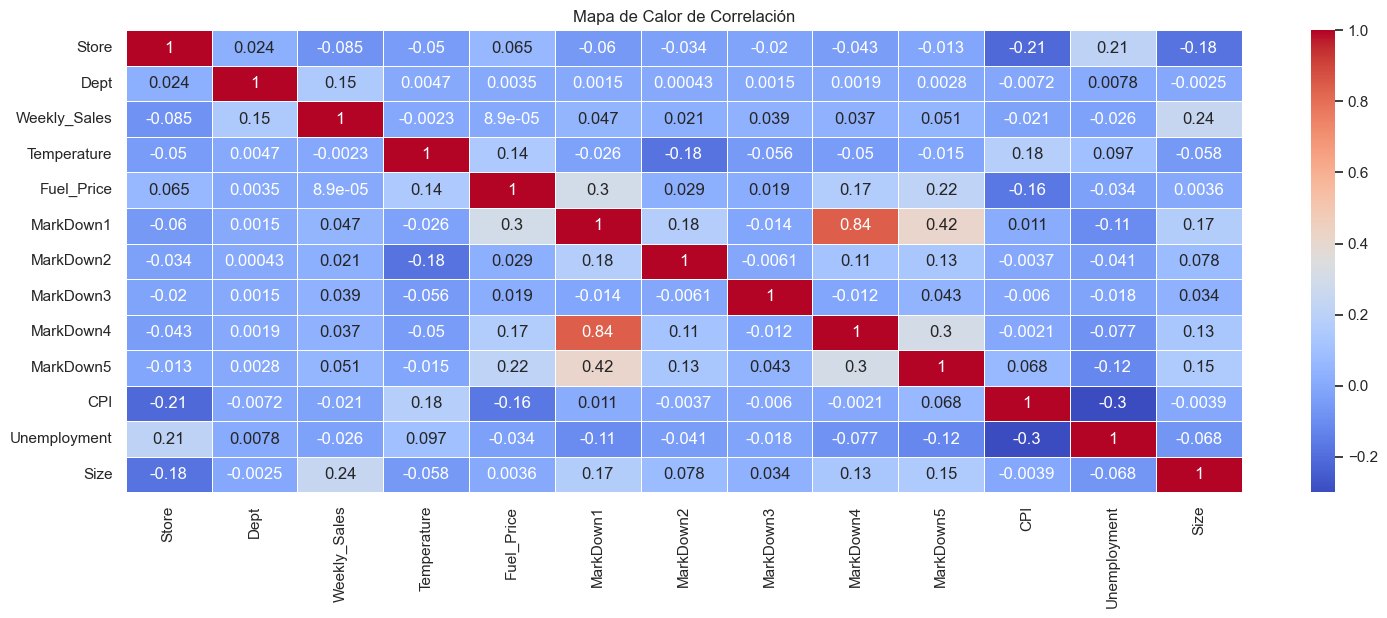

In [71]:
## Matriz de correlaciones


# Seleccionar solo columnas numéricas
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Graficar el heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()






Estacionariedad
Una serie de tiempo es estacionaria si sus características estadísticas, como la media y la varianza, permanecen constantes a lo largo del tiempo. Muchos modelos de series de tiempo requieren datos estacionarios para funcionar correctamente, por lo que es importante verificar esta condición y, si es necesario, aplicar transformaciones para estabilizar la serie.

Autocorrelación
La autocorrelación mide la relación entre los valores actuales de la serie y sus valores pasados. Si existe autocorrelación, los valores anteriores pueden influir directamente en los valores futuros. Esto es importante al seleccionar un modelo, ya que algunos son más efectivos para datos con alta autocorrelación.

Tendencias y patrones estacionales
Las series de tiempo pueden presentar tendencias a largo plazo y fluctuaciones estacionales en intervalos regulares. Identificar y ajustar estos patrones es esencial para evitar errores en las predicciones y mejorar el desempeño del modelo.

Ruido y variabilidad aleatoria
Las series de tiempo pueden verse afectadas por ruido o variabilidad aleatoria, lo que puede distorsionar las predicciones. Es fundamental analizar el origen de este ruido y aplicar técnicas que reduzcan su impacto.

Influencia de variables externas
Las series de tiempo pueden depender de variables externas que no forman parte de la serie original. Incluir estas variables exógenas en el modelo puede mejorar significativamente la precisión de las predicciones.

In [ ]:
## hacer esas pruebas y ensayar con sarima, autoarima o buscar otros modelos de series de tiempo.